<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Retail_Crypto_Universe_Return_by_Meme_Coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Are Meme Coins or "Useful" Coins More Useful to an Investor?
## Initialization

In [1]:
from my_library import *

14:00:37 Starting...
14:00:37 Installing yfinance into Google notebook...
14:00:41 Installing arch into Google notebook...
14:00:49 Initialized.


## Get the Data

In [2]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=list(map(lambda x:x.replace("-USD",""),data.columns.droplevel(1)))
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
display(data)

Return (%),AAVE,ADA,ARB,AVAX,BCH,BONK,BTC,COMP,DOGE,ETC,...,PNUT,POPCAT,SHIB,SOL,TRUMP,UNI,WIF,XLM,XRP,XTZ
UTC Date,,,,,,,,,,,,,,,,,,,,,
2024-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-08,NaN,NaN,NaN,NaN,NaN,NaN,1.448534,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-09,NaN,NaN,NaN,NaN,NaN,NaN,2.348370,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.402624,NaN,0.477437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-11,NaN,NaN,NaN,NaN,2.013289,NaN,-0.655153,NaN,-1.226744,-1.542857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-31,-1.597812,-0.370279,2.016925,1.351424,4.164440,2.472952,0.654673,1.373452,-0.466973,0.075769,...,4.092881,4.404368,0.549020,0.253230,3.926185,-2.360146,-3.763460,-0.202066,1.760098,1.419947
2025-06-01,-0.413236,-0.102011,0.677095,0.310496,-2.829815,1.779789,0.964989,0.449020,0.588750,0.870018,...,2.306108,2.930153,1.014041,0.812592,1.196886,4.122527,2.533448,1.226157,0.202709,0.015858
2025-06-02,4.738983,0.685630,4.613326,1.390837,0.100310,3.645525,0.214417,1.539383,0.764745,2.739504,...,1.214598,3.287893,1.969112,-0.573393,-0.472872,2.212803,9.030026,1.721579,0.820036,1.666796


## Plot the Data Existence Matrix

14:00:54 Wrote figure to 'Data Existence Matrix for Robinhood Cryptocurrency Sample.png'.


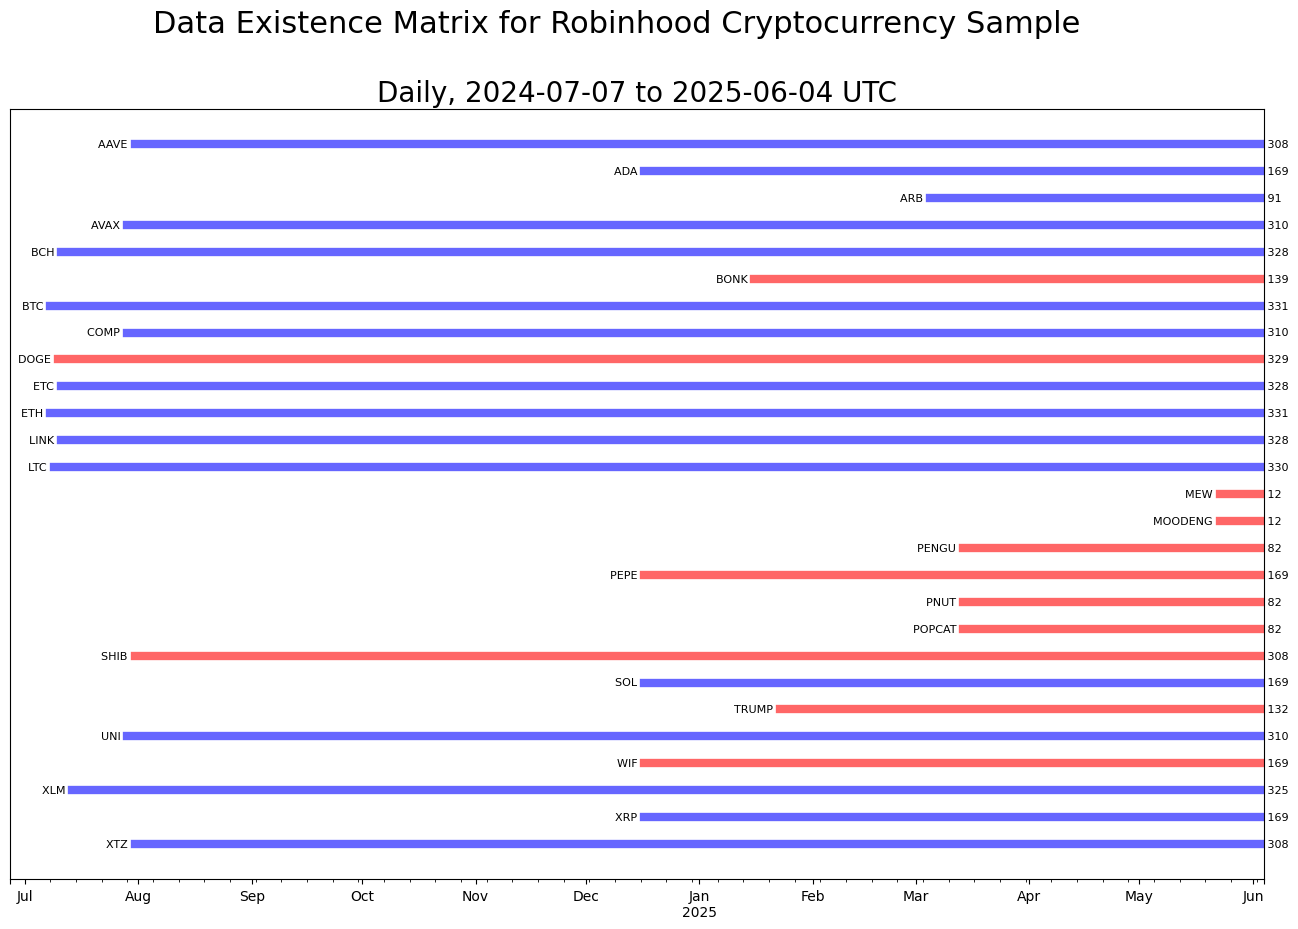

In [3]:
# data existence matrix
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
meme_coins="BONK,DOGE,PENGU,PEPE,PNUT,POPCAT,SHIB,TRUMP,WIF,MEW,MOODENG".split(",")

(df:=data.apply(lambda x:pd.Series(x.items(),index=x.index).apply(lambda y:np.nan if np.isnan(y[1]) else list(reversed(data.columns)).index(y[0])),axis=1)).plot(
    ax=plot,
    legend=False,
    color=list(map(lambda c:"red" if c in meme_coins else "blue",df.columns)),
    linewidth=6,
    alpha=0.6
)
plot.set_xlabel(None)
figure.suptitle(title:='Data Existence Matrix for Robinhood Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (data.index[0],data.index[-1]),fontsize=20)
plot.yaxis.set_visible(False)

for coin in data:
    plot.text(x:=df[coin].first_valid_index(),y:=df.loc[x,coin],coin+'  ',fontsize=8,ha='right',va='center')
    plot.text(xx:=df[coin].last_valid_index(),y," {:,d}".format((xx-x).n),fontsize=8,ha='left',va='center')

plot.set_xlim(df.index[0]-10,None)
figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

## Plot the Cumulative Returns with Median Imputation for New Listings

14:01:04 Wrote figure to 'Cumulative Return for Retail Cryptocurrency Sample.png'.


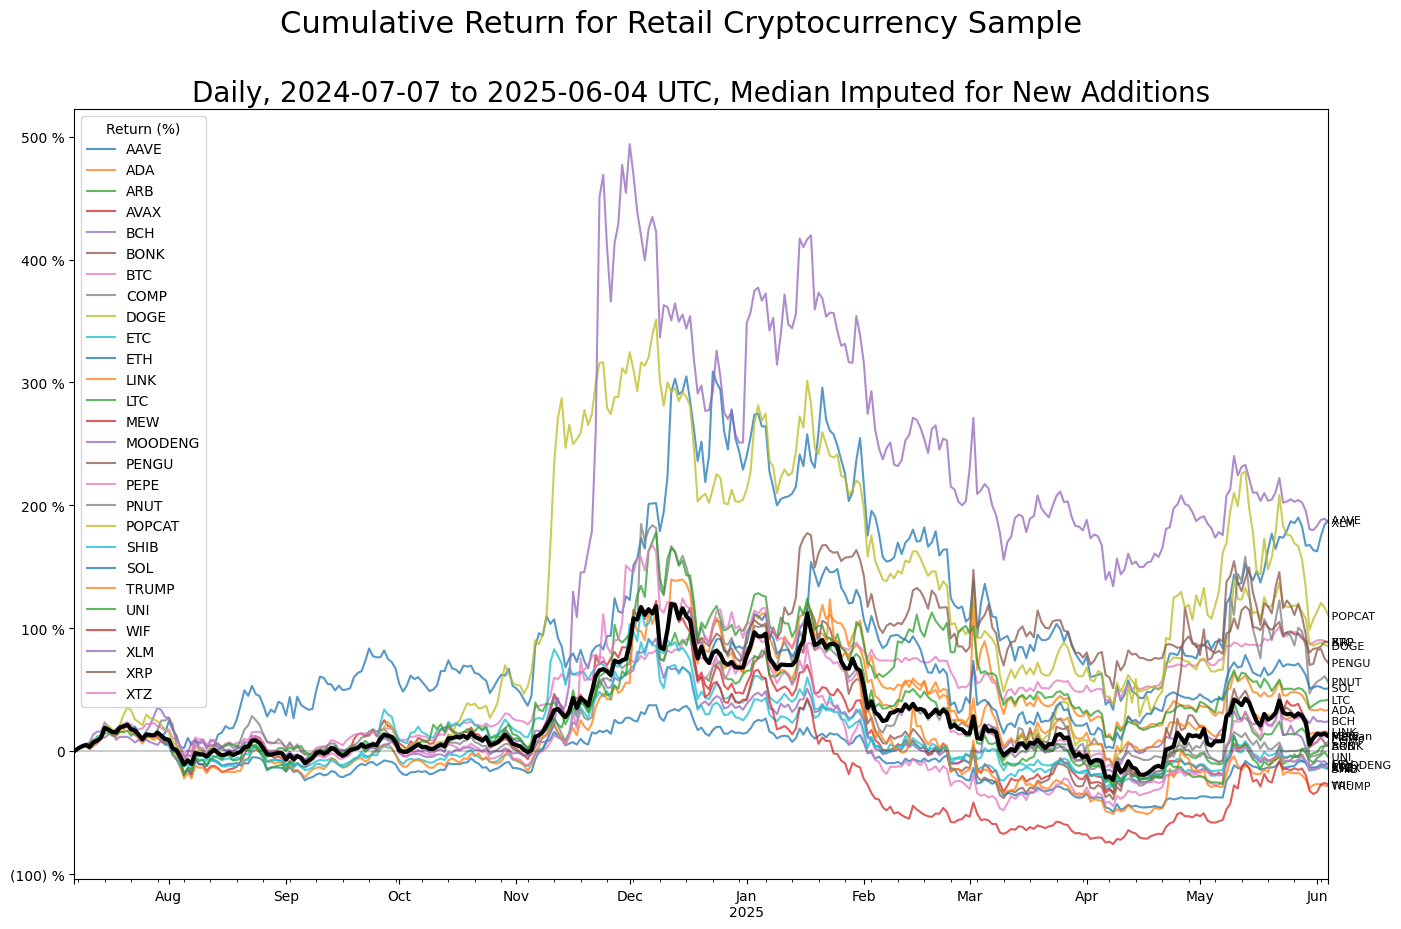

In [4]:
factor=(one+data/hundred)

for k,v in sorted(zip((s:=factor.apply(lambda x:x.first_valid_index()-1)).values,s.index),key=lambda x:x[0]):
    factor.loc[k,v]=m if not np.isnan(m:=factor.cumprod().loc[k].median()) else one

factor=factor.cumprod()*hundred-hundred
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
factor.plot(ax=plot,alpha=0.75)
factor['Median']=factor.median(axis=1)
factor['Median'].plot(ax=plot,color='black',linewidth=3)

plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Cumulative Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC, Median Imputed for New Additions" % (factor.index[0],factor.index[-1]),fontsize=20)

for c in factor:
    plot.text(x:=factor.index[-1],y:=factor.loc[x,c]," "+c,fontsize=8,ha='left',va='center')

figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

## Plot the Return by Coin

14:12:12 Excluding recently listed coins from analysis: MEW, MOODENG...


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin
Return (%),,,,,,,,,,
AAVE,0.477400,0.731636,4.997658,83,0.548564,1.333729,0.182293,,1,0.0
ADA,-0.053490,0.050445,4.001253,83,0.439195,0.114859,0.908557,,2,0.0
ARB,0.433240,0.212248,5.695327,83,0.625143,0.339518,0.734219,,3,0.0
AVAX,0.226491,0.256195,4.746493,83,0.520995,0.491742,0.622902,,4,0.0
BCH,0.100310,0.331053,3.911354,83,0.429327,0.771097,0.440649,,5,0.0
BONK,0.058962,0.830260,7.738272,83,0.849386,0.977483,0.328330,,6,1.0
BTC,0.217132,0.336417,2.326946,83,0.255416,1.317136,0.187793,,7,0.0
COMP,0.107145,0.232855,4.032942,83,0.442673,0.526021,0.598873,,8,0.0
DOGE,-0.047322,0.304563,5.078877,83,0.557479,0.546323,0.584844,,9,1.0


14:12:13 Wrote figure to 'Mean Return for Retail Cryptocurrency Sample.png'.


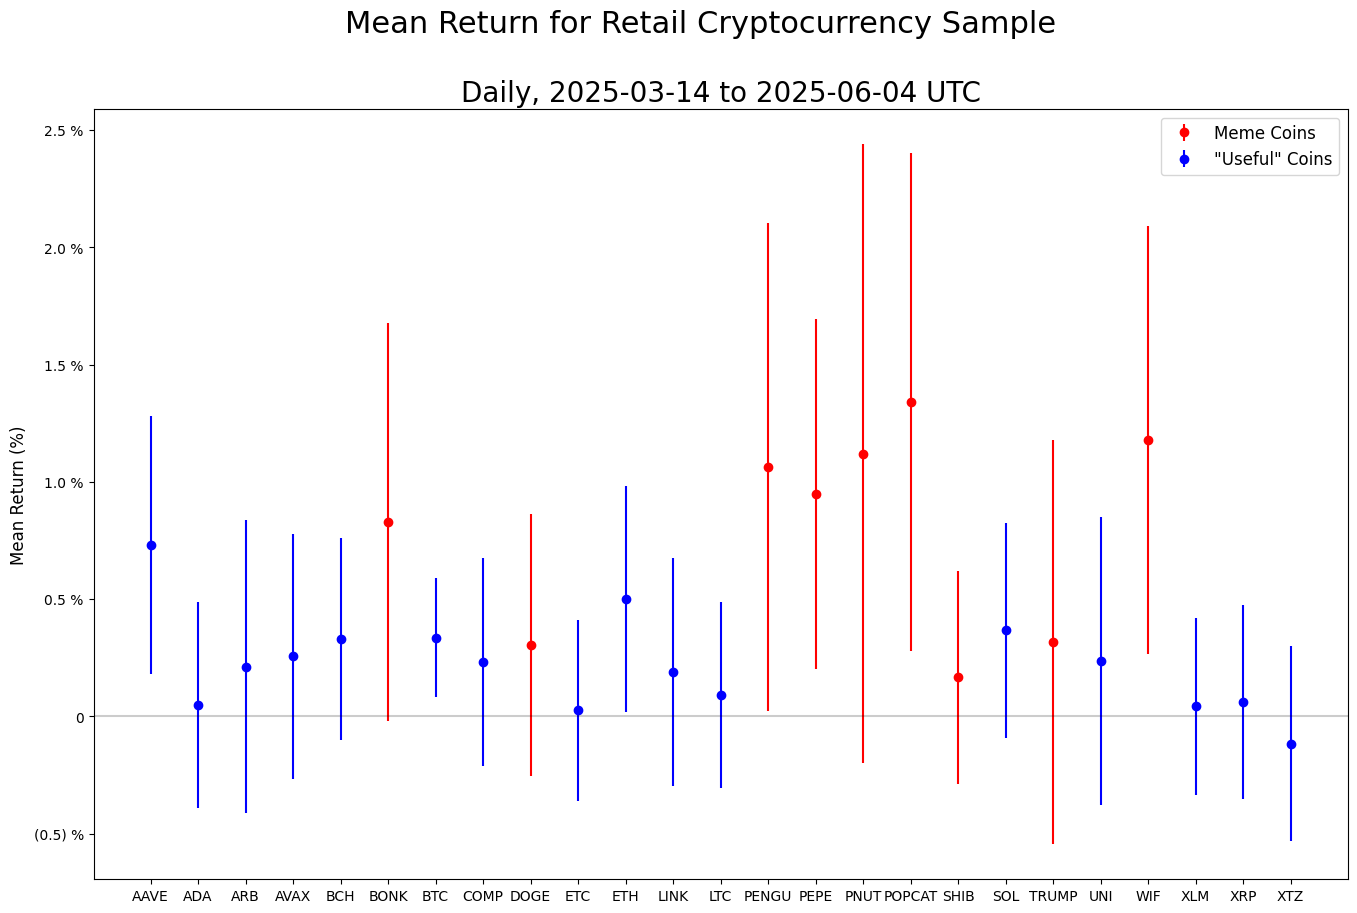

In [10]:
nprint("Excluding recently listed coins from analysis: %s..." % ", ".join(c:=(data.index[-1]-data.apply(lambda x:x.first_valid_index(),axis=0)).apply(lambda x:np.nan if x.n>60 else x.n).dropna().index))

report=pd.DataFrame({ # drop recently listed coins and then drop na's, to ensure we have sufficient history for this analysis
    "Median":(design:=data.drop(columns=c).dropna(axis=0).sort_index()).median(), # sort index not needed, but let's do it anyway
    "Mean":(m:=design.mean()),
    "Std.Dev.":design.std(),
    "Sample":design.count(),
    "Std.Err.":(e:=design.std()/np.sqrt(design.count())),
    "t Statistic":(z:=m/e),
    "p Value":(p:=z.apply(lambda x:two*min([norm.cdf(x),norm.sf(x)]))),
    "Significance":p.apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else ""),
    "Symbol Rank":list(range(1,m.index.shape[0]+1)),
    "Meme Coin":[one if t in meme_coins else zero for t in m.index]
})

display(report)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=report.index,y:=report["Mean"],alpha=0,label=None)
plot.errorbar(x:=report[report["Meme Coin"]==one].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Red",label='Meme Coins')
plot.errorbar(x:=report[report["Meme Coin"]==zero].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Blue",label='"Useful" Coins')
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Mean Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (design.index[0],design.index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.set_ylabel("Mean Return (%)",fontsize=12)
plot.legend(fontsize=12)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

## ANOVA Analysis by Meme Coin Indicator
### ANOVA Analysis

In [12]:
from statsmodels.formula.api import ols as OLSformula
from statsmodels.stats.anova import anova_lm

nprint("One Way ANOVA Analysis by {}".format(group_name:="Meme Coin"))
anova=anova_lm(OLSformula("Mean ~ {:s}".format(group_name.replace(" ","_")),report.rename(columns={c:c.replace(" ","_") for c in report})).fit(),typ=2).rename(columns={'sum_sq':'Sum of Squares','df':'d.o.f.','PR(>F)':'p Value','F':'F Statistic'})
anova['Significance']=anova['p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
anova['Adjusted p Value']=anova["p Value"]*ten
anova['Adjusted Significance']=anova['Adjusted p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
anova.index=['Between Groups','Within Groups']
anova.index.name='Variation'
display(anova.replace(np.nan,""))

14:39:13 One Way ANOVA Analysis by Meme Coin


,Sum of Squares,d.o.f.,F Statistic,p Value,Significance,Adjusted p Value,Adjusted Significance
Variation,,,,,,,
Between Groups,1.978201,1.0,21.129455,0.000127,***,0.001272,**
Within Groups,2.153327,23.0,,,,,


### Aggregate Properties of the Empirical Distributions of the Members of the two Groups

In [41]:
universe=list(set(meme_coins).difference(c))
report=pd.DataFrame([v.melt().describe().rename(columns={"value":k}).iloc[:,0] for k,v in \
          [("Meme Coins",design[universe]),('"Useful" Coins',design.drop(columns=universe))]])
report.rename(columns={"count":"Sample","std":"Std.Dev.","min":"Minimum","max":"Maximum","mean":"Mean"},inplace=True)
report["Std.Err."]=report["Std.Dev."]/np.sqrt(report["Sample"])
report["t Statistic"]=report["Mean"]/report["Std.Err."]
report["p Value"]=report["t Statistic"].apply(lambda x:two*min([norm.cdf(x),norm.sf(x)]))
report["Significance"]=report["p Value"].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
display(report)

,Sample,Mean,Std.Dev.,Minimum,25%,50%,75%,Maximum,Std.Err.,t Statistic,p Value,Significance
Meme Coins,747.0,0.808071,8.180435,-20.417809,-3.538248,0.022926,3.686859,76.138701,0.299306,2.699811,0.006938,**
"""Useful"" Coins",1328.0,0.222035,4.212921,-15.966234,-2.045336,0.111755,2.020548,27.730008,0.115607,1.920603,0.054782,
